In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral(Omentum)":"Adipose.V",
    "Brain-Caudate(basalganglia)":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed(Suprapubic)": "SkinUnexposed",
    "Skin-SunExposed(Lowerleg)":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood",
}

def correl(X, Y):
    """Computes the Pearson correlation coefficient and a 95% confidence
    interval based on the data in X and Y."""
    r = np.corrcoef(X, Y)[0,1]
    f = 0.5*np.log((1+r)/(1-r))
    se = 1/np.sqrt(len(X)-3)
    ucl = f + 2*se
    lcl = f - 2*se
    #
    lcl = (np.exp(2*lcl) - 1) / (np.exp(2*lcl) + 1)
    ucl = (np.exp(2*ucl) - 1) / (np.exp(2*ucl) + 1)
    return r,lcl,ucl


def draw_colormap (cmap_name,width=30,height=1,fontsize=50,fig = None, ax=None,
                  ticklabels_bd = (0,1), num_ticks =11):
    """
    cmap_name is a string.
    """
    if fig is None:
        fig = plt.figure(figsize=(width,height))
    if ax is None:
        ax = plt.gca()
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto',cmap=plt.get_cmap(cmap_name))
    ax.set_xticks(np.linspace(0,256,num_ticks))
    ax.set_xticklabels(np.linspace(ticklabels_bd[0],ticklabels_bd[1],num_ticks))
    ax.set_yticklabels([])
                 
Phenotype1='/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002743.v7.p2.c1.GTEx_Sample_Attributes.GRU.txt.gz'
Phenotype2 = '/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002742.v7.p2.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
MAINDIR = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'
TISSUES = sorted([item for item in list(SHORTEN.keys())])
P1=pd.read_csv(Phenotype1, compression='gzip', sep='\t', quotechar='"', skiprows=10)
P2=pd.read_csv(Phenotype2, compression='gzip', sep='\t', quotechar='"', skiprows=10)

In [4]:
IND1=['SAMPID','SMGEBTCH','SMTSISCH','SMTPAX','SMTSTPTREF','SMNABTCH','SMCENTER']
IND2=['SUBJID','AGE','TRISCHD','RACE','GENDER', 'DTHHRDY', 'SMTSISCH']
P1['SAMPID'] = [x.split('-')[:2] for x in list(P1['SAMPID'])]
P2['SUBJID'] = [x.split('-')[:2] for x in list(P2['SUBJID'])]
VAR1 = P1.loc[:,IND1]
VAR2 = P2.loc[:,IND2]

for T in TISSUES:
    peerfactors = pd.read_csv(MAINDIR+'WholeBlood/peerFactors.tsv',sep='\t')
    idx = sorted([x.replace('.','-') for x in list(peerfactors.index)])
    peerfactors.index = idx
    #
    V1 = VAR1.loc[VAR1['SAMPID'].isin(idx)]   #Select samples
    V1 = V1.groupby('SAMPID').first()      #Remove Duplicate... 
    V2 = VAR2.loc[VAR2['SAMPID'].isin(idx)]   #Select samples
    V2 = V2.groupby('SAMPID').first()      #Remove Duplicate... 
    
    
    
    break
peerfactors

,dbGaP_Sample_ID,SAMPID,SMATSSCR,SMCAT,SMCENTER,SMMTRLTP,SMNOTES,SMOMTRLTP,SMPTHNTS,SMRIN,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
0,1663514,GTEX-1117F-0003-SM-58Q7G,NaN,Yellow Kit: Skin and Blood Donation,B1,Whole Blood:Whole Blood,NaN,Whole Blood:Whole Blood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1663515,GTEX-1117F-0003-SM-5DWSB,NaN,Yellow Kit: Skin and Blood Donation,B1,Whole Blood:Whole Blood,NaN,Whole Blood:Whole Blood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1905755,GTEX-1117F-0003-SM-6WBT7,NaN,Yellow Kit: Skin and Blood Donation,B1,Whole Blood:Whole Blood,NaN,Whole Blood:Whole Blood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1267262,GTEX-1117F-0226-SM-5GZZ7,0.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, ~15% vessel stroma, rep delineated",6.8,...,14579275.0,12025354.0,0.003164,14634407.0,50.094357,0.003102,0.992826,NaN,0.0,50.126280
4,1267263,GTEX-1117F-0426-SM-5EGHI,0.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, !5% fibrous connective tissue, delin...",7.1,...,13134349.0,11578874.0,0.003991,13307871.0,50.328114,0.006991,0.994212,NaN,0.0,49.905170
5,1267264,GTEX-1117F-0526-SM-5EGHJ,0.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,...,13169835.0,11015113.0,0.004285,13160068.0,49.981450,0.002867,0.992711,NaN,0.0,50.227848
6,1267265,GTEX-1117F-0626-SM-5N9CS,1.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, up to 4mm aderent fat/nerve/vessel, ...",6.9,...,15148343.0,11624467.0,0.003379,15282444.0,50.220333,0.005335,0.991175,NaN,0.0,50.025043
7,1267266,GTEX-1117F-0726-SM-5GIEN,1.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, no abnormalities",6.3,...,13583226.0,9262806.0,0.003451,13745609.0,50.297090,0.030579,0.994478,NaN,0.0,49.929870
8,1267267,GTEX-1117F-1326-SM-5EGHH,1.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"2 pieces, diffuse mesothelial hyperplasia; ~10...",5.9,...,13342709.0,9625148.0,0.004869,13393827.0,50.095592,0.010321,0.989115,NaN,0.0,50.058605
9,1267268,GTEX-1117F-2226-SM-5N9CH,1.0,Aqua Kit: Organ and Tissue Donation,B1,Tissue:PAXgene Preserved,NaN,Tissue:Fresh Tissue,"1 piece vascular tissue, probably ovarian hilu...",6.6,...,15767801.0,12721979.0,0.003328,15920208.0,50.240480,0.002097,0.990144,NaN,0.0,49.962017


In [10]:

Vars = IT.loc[:,code]
Vars

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app
/usr/lib64/python3.4/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,SAMPID,SMGEBTCH,SMTSISCH,SMTPAX,SMTSTPTREF,SMNABTCH,SMCENTER
0,GTEX-1117F-0003-SM-58Q7G,LCSET-4574,1188.0,NaN,NaN,BP-38516,B1
1,GTEX-1117F-0003-SM-5DWSB,GTEx_OM25_Dec_01,1188.0,NaN,NaN,BP-38516,B1
2,GTEX-1117F-0003-SM-6WBT7,LCSET-6056,1188.0,NaN,NaN,BP-38543,B1
3,GTEX-1117F-0226-SM-5GZZ7,LCSET-4804,1214.0,NaN,NaN,BP-43693,B1
4,GTEX-1117F-0426-SM-5EGHI,LCSET-4764,1220.0,NaN,NaN,BP-43495,B1
5,GTEX-1117F-0526-SM-5EGHJ,LCSET-4764,1221.0,NaN,NaN,BP-43495,B1
6,GTEX-1117F-0626-SM-5N9CS,LCSET-4904,1243.0,NaN,NaN,BP-43956,B1
7,GTEX-1117F-0726-SM-5GIEN,LCSET-4796,1244.0,NaN,NaN,BP-44261,B1
8,GTEX-1117F-1326-SM-5EGHH,LCSET-4764,1277.0,NaN,NaN,BP-43495,B1
9,GTEX-1117F-2226-SM-5N9CH,LCSET-4904,1326.0,NaN,NaN,BP-43956,B1


In [5]:

peerfactors = pd.read_csv(MAINDIR+'WholeBlood/peerFactors.tsv',sep='\t')
idx = sorted([x.replace('.','-') for x in list(peerfactors.index)])
peerfactors.index = idx

#Get covariates & Other phenotypes
    #AGE - RACE - ETHNICITY
#Get Sample variables from phonotype table

IT = IT.loc[IT['SMMTRLTP'].isin(['Whole Blood:Whole Blood'])] #
IT['SAMPID'] = [x[:9] for x in list(IT['SAMPID'])]   #Reformat ID first 9 char
print (len(IT['SAMPID']))   
#print (IT)#.columns)
code=['SAMPID','SMGEBTCH','SMTSISCH','SMTPAX','SMTSTPTREF','SMNABTCH','SMCENTER']
Vars = IT.loc[:,code]
Vars = Vars.loc[Vars['SAMPID'].isin(idx)]   #Select only the we are interested in
Vars = Vars.groupby('SAMPID').first()      #There Duplicate... Remove it
#print(peerfactors)
print(Vars.shape, ' Next... peer')
#Get all matching samples Expr--Phenotypes
L=list(Vars.index)
peerfactors = peerfactors.loc[peerfactors.index.isin(L)]
print(peerfactors.shape, ' Next ... plot')

#------------------#SMGEBTCH**  SMTSISCH  SMTPAX*nan*  SMTSTPTREF*   SMNABTCH**  SMCENTER 
Index=['V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

SMTSISCH = [ss.pearsonr(peerfactors[YY].values,Vars['SMTSISCH'].values)[0] for YY in Index]
SMCENTER = [ss.spearmanr(peerfactors[YY].values,Vars['SMCENTER'].values).correlation for YY in Index]
SMTSTPTREF =[ss.spearmanr(peerfactors[YY].values,Vars['SMTSTPTREF'].values).correlation for YY in Index]

#GET other phenotypes

Phenotypes='/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002742.v6.p1.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
IT=pd.read_csv(Phenotypes, compression='gzip', sep='\t', quotechar='"', skiprows=10)
#IT['SAMPID'] = [x[:9] for x in list(IT['SAMPID'])]
ind=['SUBJID','AGE','TRISCHD','RACE','GENDER', 'DTHHRDY', 'SMTSISCH']
Ischtime = IT.loc[:,ind]
Isctime=Ischtime.loc[Ischtime['SUBJID'].isin(idx)]
Isctime=Isctime.loc[Isctime['SUBJID'].isin(L)]
#print(Isctime['SUBJID'])
print(Isctime.shape)

TRISCHD=[ss.pearsonr(peerfactors[YY].values,Isctime['TRISCHD'].values)[0] for YY in Index]
DTHHRDY=[ss.spearmanr(peerfactors[YY].values,Isctime['DTHHRDY'].values).correlation for YY in Index]
AGE = [ss.pearsonr(peerfactors[YY].values,Isctime['AGE'].values)[0] for YY in Index]

df = pd.DataFrame( {'SMTSISCH': SMTSISCH,'SMCENTER':SMCENTER,'SMTSTPTREF':SMTSTPTREF,
     'TRISCHD': TRISCHD,'DTHHRDY':DTHHRDY, 'AGE':AGE }, index=Index)

X=Vars['SMTSISCH']
print(ss.pearsonr(peerfactors['V2'].values,X.values)[0])
print(ss.pearsonr(peerfactors['V2'].values,X.values)[1])

143
(143, 36)
1449
(138, 6)  Next... peer
(138, 36)  Next ... plot
(138, 7)
0.392164474524
1.965341811e-06


/usr/lib64/python3.4/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


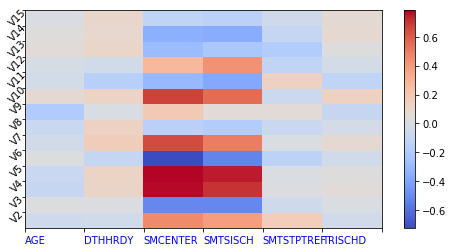

,AGE,DTHHRDY,SMCENTER,SMTSISCH,SMTSTPTREF,TRISCHD
V2,-0.049913,-0.045785,0.463737,0.392164,0.168459,-0.037128
V3,0.023793,0.014168,-0.514903,-0.514540,-0.050216,0.011148
V4,-0.087758,0.118252,0.775678,0.709114,0.014649,0.052244
V5,-0.076185,0.120586,0.781997,0.752582,0.010957,0.033656
V6,0.019401,-0.096209,-0.720947,-0.525938,-0.135412,-0.039898
V7,-0.038711,0.164120,0.649766,0.501371,0.011778,0.074406
V8,-0.078720,0.134520,-0.148573,-0.177893,-0.071896,-0.017535
V9,-0.188031,0.010720,0.194693,0.054955,0.056544,-0.087124
V10,0.073961,0.122665,0.674388,0.556344,-0.066739,0.138625
V11,-0.032796,-0.159064,-0.297308,-0.378214,0.141330,-0.119996


In [35]:
labels = list(df.columns)
fig = plt.subplots(figsize=(8,4))
# Add intuitive labels to axes

plt.xticks(range(len(labels)+1), labels, color='b',ha='left')
plt.yticks(range(1,15,1), df.index, rotation=45, ha='center' )

#visualize correlations using heatmap
plt.pcolor(df,cmap='coolwarm')
plt.colorbar()

plt.grid(False)
plt.show()
df

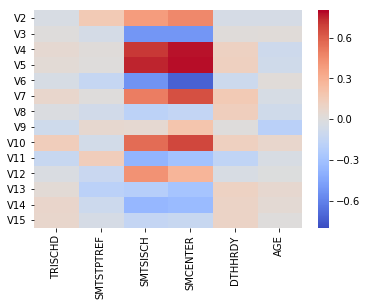

In [48]:
import seaborn.apionly as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df, cmap='coolwarm', vmin=-.8, vmax=.8, square=False, ax=ax,
           xticklabels=labels, yticklabels=list(df.index));
ax.invert_xaxis();
plt.show()

##linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, annot_kws={"size": 8},

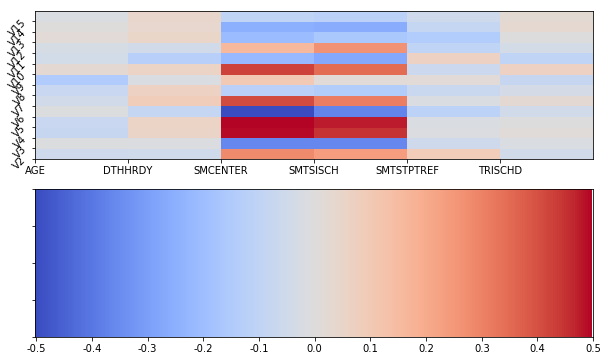

,AGE,DTHHRDY,SMCENTER,SMTSISCH,SMTSTPTREF,TRISCHD
V2,-0.049913,-0.045785,0.463737,0.392164,0.168459,-0.037128
V3,0.023793,0.014168,-0.514903,-0.514540,-0.050216,0.011148
V4,-0.087758,0.118252,0.775678,0.709114,0.014649,0.052244
V5,-0.076185,0.120586,0.781997,0.752582,0.010957,0.033656
V6,0.019401,-0.096209,-0.720947,-0.525938,-0.135412,-0.039898
V7,-0.038711,0.164120,0.649766,0.501371,0.011778,0.074406
V8,-0.078720,0.134520,-0.148573,-0.177893,-0.071896,-0.017535
V9,-0.188031,0.010720,0.194693,0.054955,0.056544,-0.087124
V10,0.073961,0.122665,0.674388,0.556344,-0.066739,0.138625
V11,-0.032796,-0.159064,-0.297308,-0.378214,0.141330,-0.119996


In [25]:
labels = list(df.columns)

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
# Add intuitive labels to axes
ax0,ax1 = axes[0],axes[1]
ax0.set_xticks(range(len(labels)))
ax0.set_xticklabels(labels)

ax0.set_yticks(range(14))
ax0.set_yticklabels(df.index,rotation=45)

#visualize correlations using heatmap
ax0.pcolor(df,cmap='coolwarm')

#fig.colorbar(ax0,ticks=np.linspace(0,1,11))
draw_colormap('coolwarm',fig=fig,ax=ax1,ticklabels_bd=(-0.5,0.5))


plt.grid(False)
plt.show()
df

In [ ]:
SMTSISCH = [ss.pearsonr(peerfactors[YY].values,Vars['SMTSISCH'].values)[1] for YY in Index]
SMCENTER = [ss.spearmanr(peerfactors[YY].values,Vars['SMCENTER'].values).pvalue for YY in Index]
SMTSTPTREF =[ss.spearmanr(peerfactors[YY].values,Vars['SMTSTPTREF'].values).pvalue for YY in Index]
TRISCHD=[ss.pearsonr(peerfactors[YY].values,Isctime['TRISCHD'].values)[1] for YY in Index]
DTHHRDY=[ss.spearmanr(peerfactors[YY].values,Isctime['DTHHRDY'].values).pvalue for YY in Index]
AGE = [ss.pearsonr(peerfactors[YY].values,Isctime['AGE'].values)[1] for YY in Index]
df1 = pd.DataFrame( {'SMTSISCH': SMTSISCH,'SMCENTER':SMCENTER,'SMTSTPTREF':SMTSTPTREF,
     'TRISCHD': TRISCHD,'DTHHRDY':DTHHRDY, 'AGE':AGE }, index=Index)
df1